# TRIP ADVISOR HOTELS REVIEWS ANALYSIS

## Import Libraries

In [19]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

## Load Datasets

In [20]:
df = pd.read_csv('./tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


## Sentiment Analysis Using Vader

In [21]:
sid = SentimentIntensityAnalyzer()

In [22]:
df['scores'] = df['Review'].apply(lambda review: sid.polarity_scores(review))

### Polarity Scores of reviews

In [23]:
df['scores'][0]

{'neg': 0.072, 'neu': 0.643, 'pos': 0.285, 'compound': 0.9747}

### Reviews Classification

In [24]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

In [25]:
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score > 0 and score < 0.4:
        return 'Neutral'
    else:
        return 'Positive'

In [26]:
df['polarity'] = df['compound'].apply(analysis)

In [27]:
df

,Review,Rating,scores,compound,polarity
0,nice hotel expensive parking got good deal sta...,4,"{'neg': 0.072, 'neu': 0.643, 'pos': 0.285, 'co...",0.9747,Positive
1,ok nothing special charge diamond member hilto...,2,"{'neg': 0.11, 'neu': 0.701, 'pos': 0.189, 'com...",0.9787,Positive
2,nice rooms not 4* experience hotel monaco seat...,3,"{'neg': 0.081, 'neu': 0.7, 'pos': 0.219, 'comp...",0.9889,Positive
3,"unique, great stay, wonderful time hotel monac...",5,"{'neg': 0.06, 'neu': 0.555, 'pos': 0.385, 'com...",0.9912,Positive
4,"great stay great stay, went seahawk game aweso...",5,"{'neg': 0.135, 'neu': 0.643, 'pos': 0.221, 'co...",0.9797,Positive
...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,"{'neg': 0.063, 'neu': 0.665, 'pos': 0.272, 'co...",0.9834,Positive
20487,great location price view hotel great quick pl...,4,"{'neg': 0.0, 'neu': 0.57, 'pos': 0.43, 'compou...",0.9753,Positive
20488,"ok just looks nice modern outside, desk staff ...",2,"{'neg': 0.131, 'neu': 0.724, 'pos': 0.145, 'co...",0.2629,Neutral
20489,hotel theft ruined vacation hotel opened sept ...,1,"{'neg': 0.15, 'neu': 0.671, 'pos': 0.179, 'com...",0.9867,Positive


### Word Cloud Positive reviews

In [28]:
pos_reviews = df[df['polarity']=='Positive']['Review']

In [29]:
pos_reviews

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms not 4* experience hotel monaco seat...
3        unique, great stay, wonderful time hotel monac...
4        great stay great stay, went seahawk game aweso...
                               ...                        
20482    great choice wife chose best western quite bit...
20483    good bed clean convenient just night happy sta...
20486    best kept secret 3rd time staying charm, not 5...
20487    great location price view hotel great quick pl...
20489    hotel theft ruined vacation hotel opened sept ...
Name: Review, Length: 18449, dtype: object

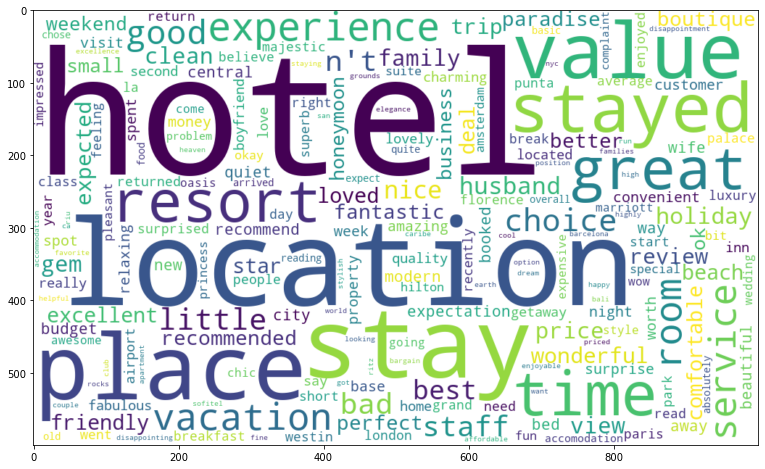

In [40]:
text = " ".join(row.split()[1] for row in pos_reviews)
plt.figure(figsize=(14,8))
word_cloud2 = WordCloud(collocations = False, background_color = 'white', width=1000,height=600,).generate(text)
plt.imshow(word_cloud2, interpolation='bilinear');

## Word Cloud Negative reviews

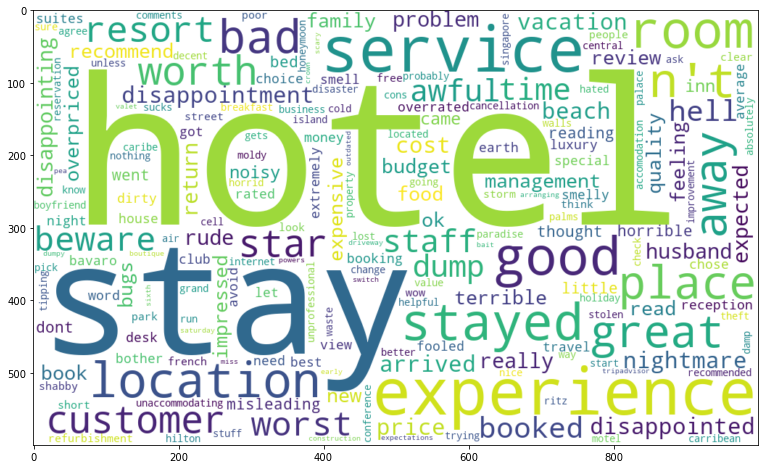

In [43]:
neg_reviews = df[df['polarity']=='Negative']['Review']
text = " ".join(row.split()[1] for row in neg_reviews)
plt.figure(figsize=(14,8))
word_cloud = WordCloud(collocations = False, background_color = 'white', width=1000,height=600,).generate(text)
plt.imshow(word_cloud, interpolation='bilinear');